<a href="https://colab.research.google.com/github/Shreyansh1206/Lattice-Physics-ML-Model/blob/main/Lattice%20Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("rawdata.csv")
modified_dataset_array = np.zeros(dataset.shape)
modified_dataset = pd.DataFrame(modified_dataset_array)

all_numbers = []
for i in range(dataset.shape[0]):
  numbers_in_row = dataset.iloc[i][0].split()
  all_numbers.extend([float(num) for num in numbers_in_row])

modified_dataset_array = np.array(all_numbers).reshape(dataset.shape[0],41)
modified_dataset = pd.DataFrame(modified_dataset_array)
modified_dataset.to_csv("modifieddata.csv", index=False)

<ipython-input-8-93b966780bfa>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numbers_in_row = dataset.iloc[i][0].split()


In [ ]:
!pip install tensorflow

               0
0       2.354766
1       1.047929
2       2.268974
3       4.637777
4       3.793194
...          ...
935956  4.615085
935957  4.423454
935958  1.592346
935959  1.785754
935960  2.527517

[935961 rows x 1 columns]


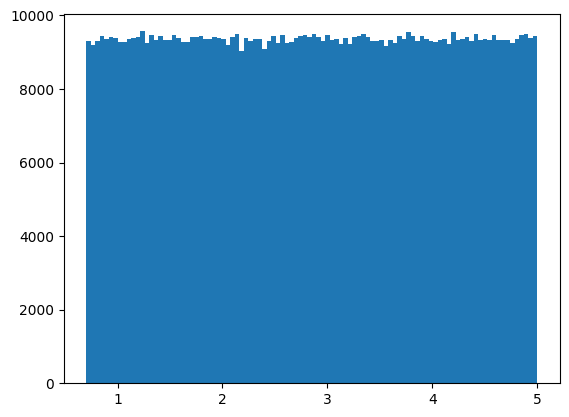

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

combined_input = pd.DataFrame(np.array(modified_dataset.iloc[:, 2:]).reshape(modified_dataset.shape[0]*39))
print(combined_input)
plt.hist(combined_input, bins = 100)
plt.show()

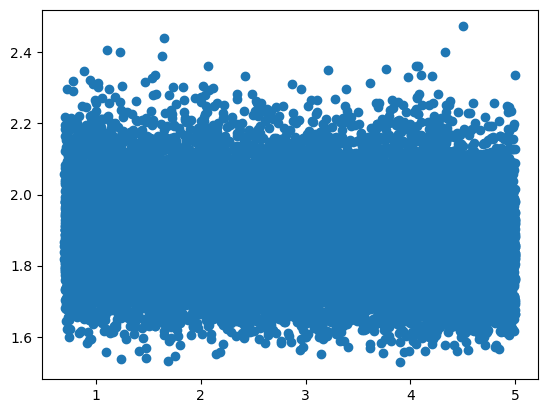

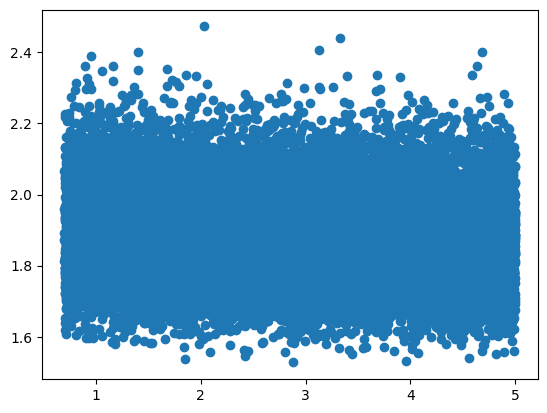

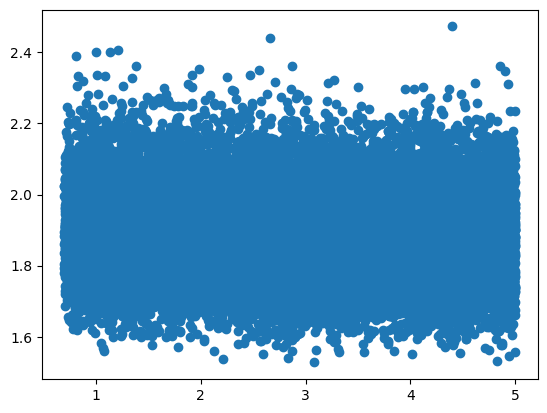

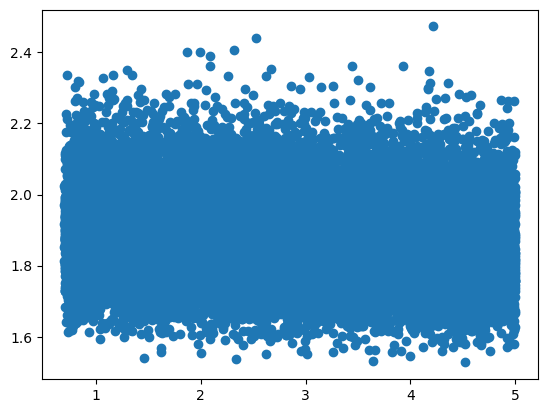

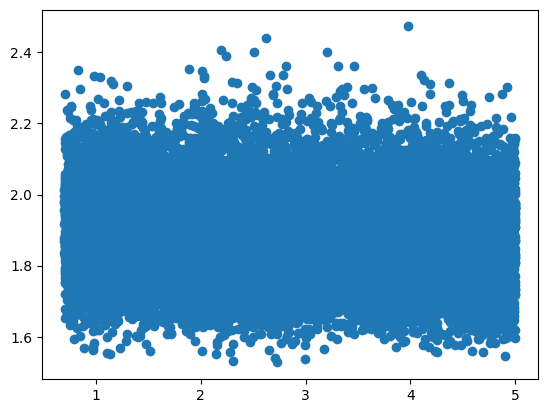

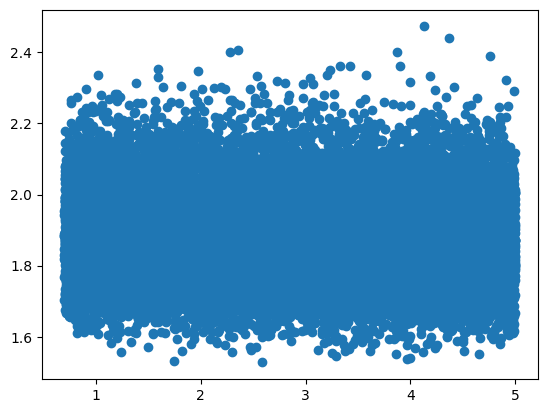

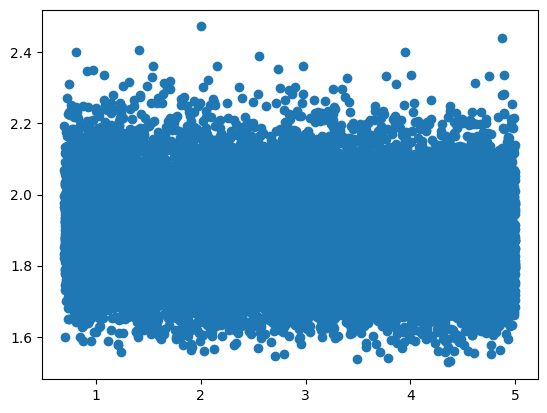

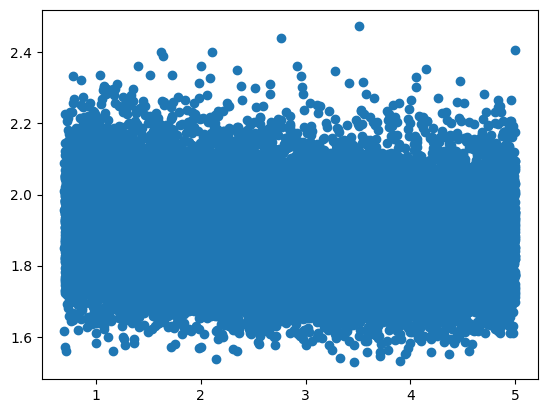

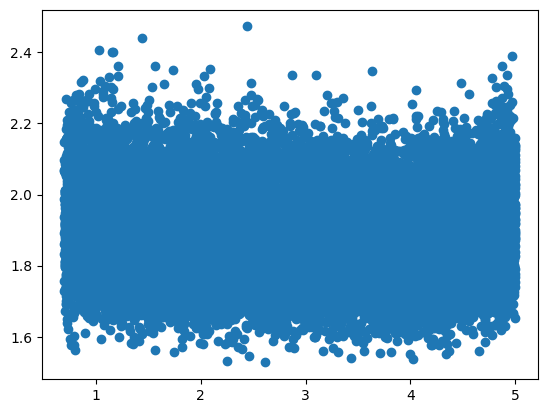

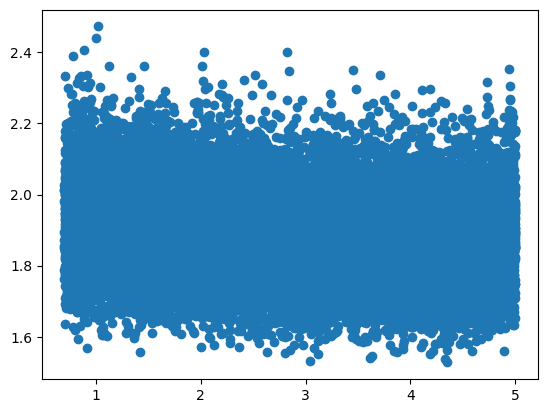

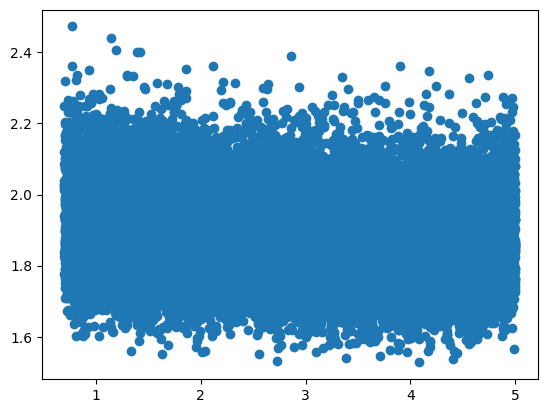

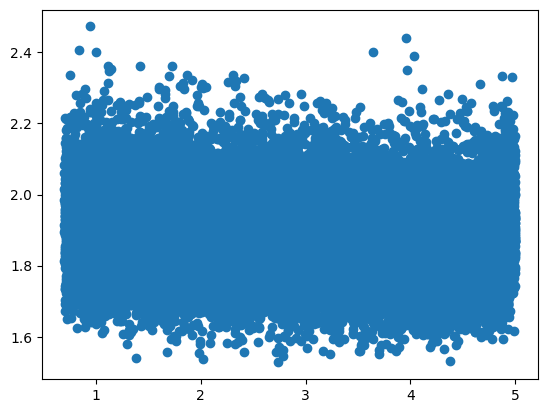

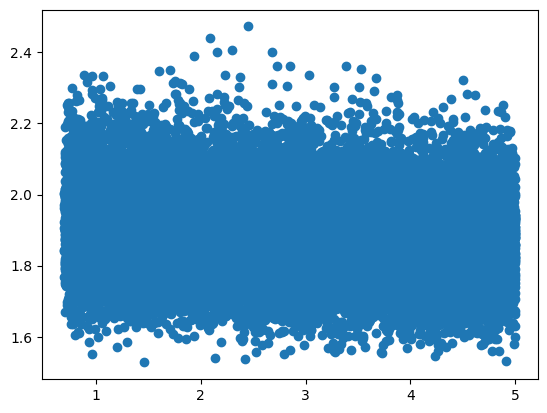

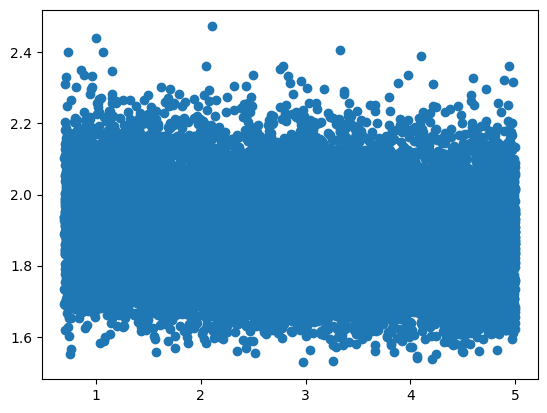

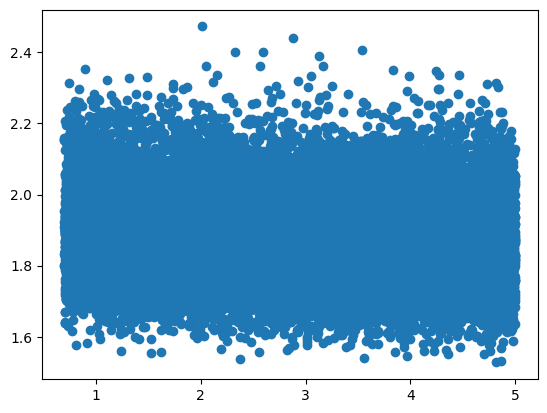

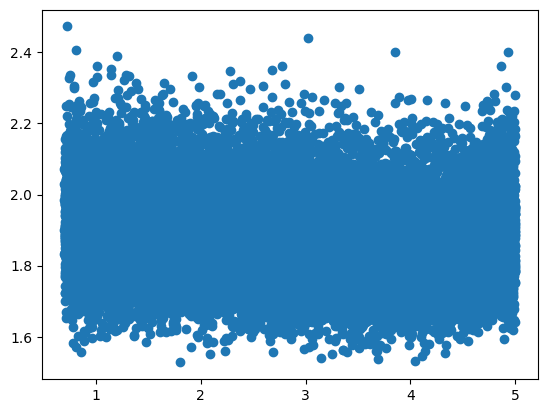

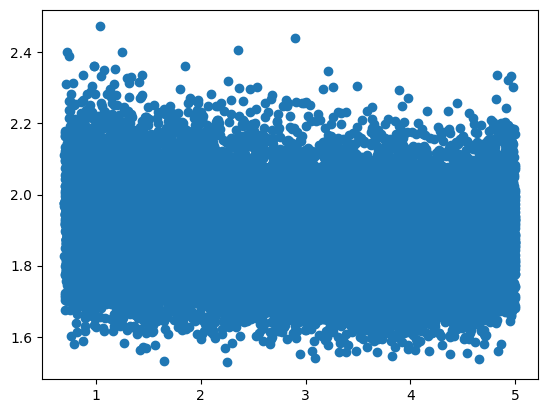

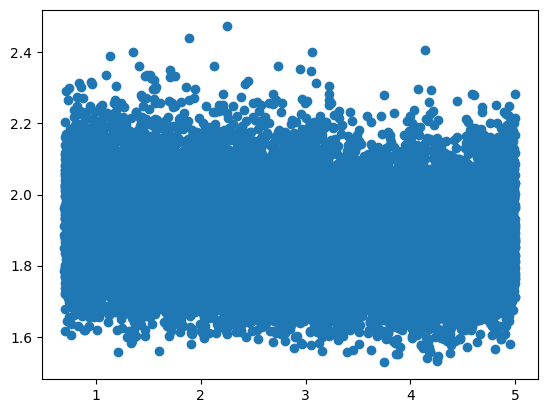

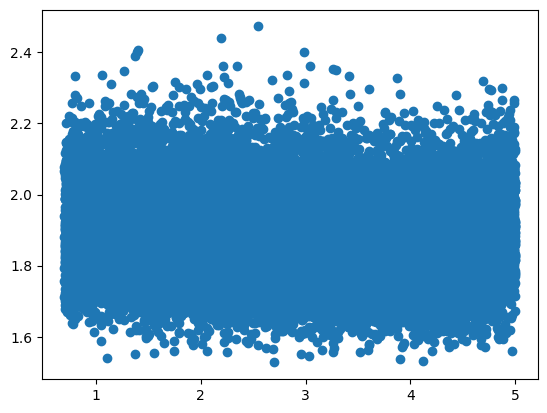

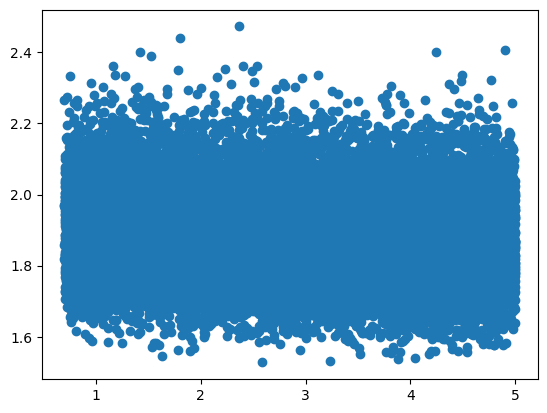

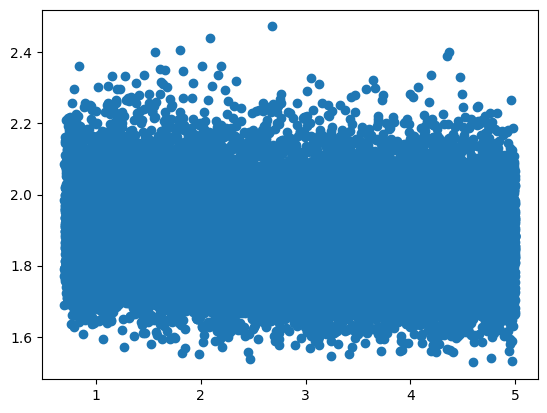

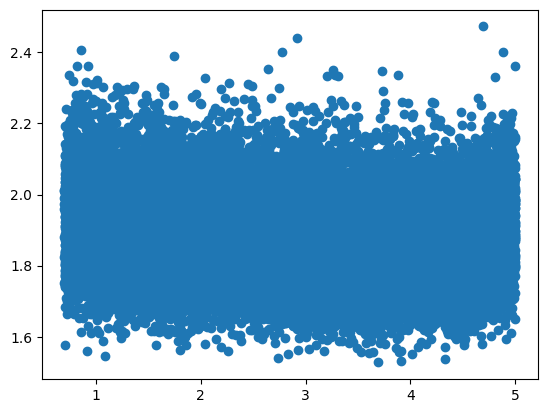

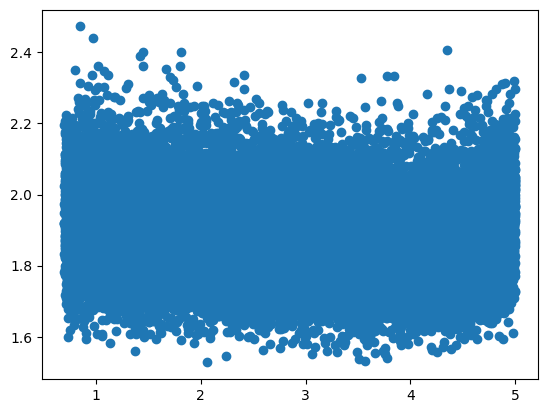

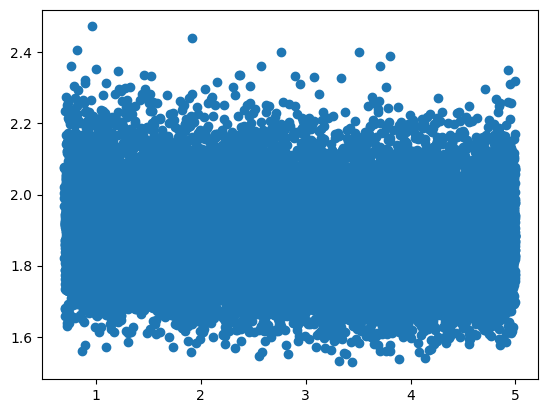

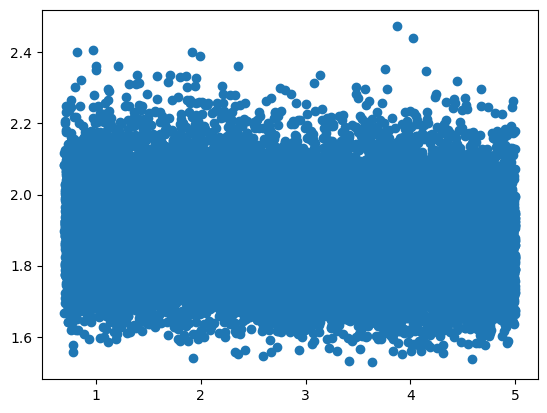

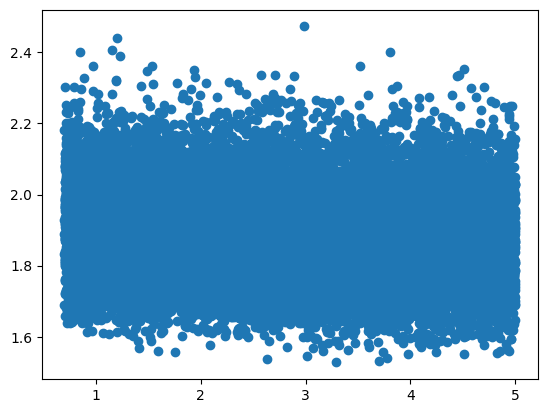

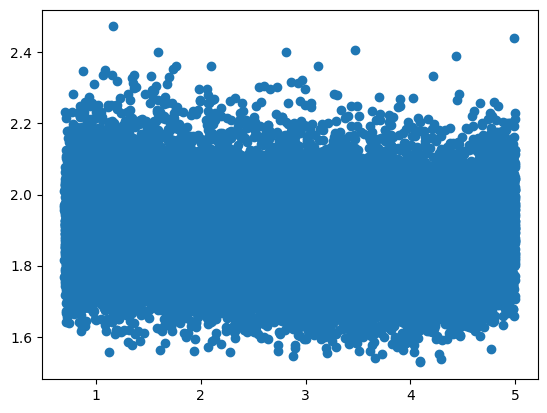

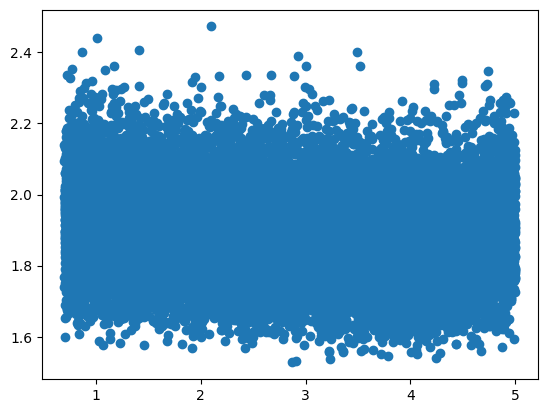

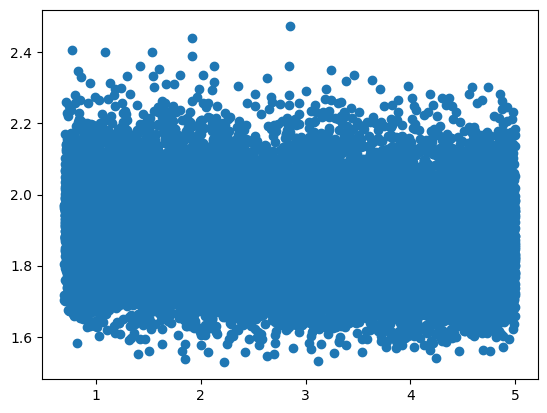

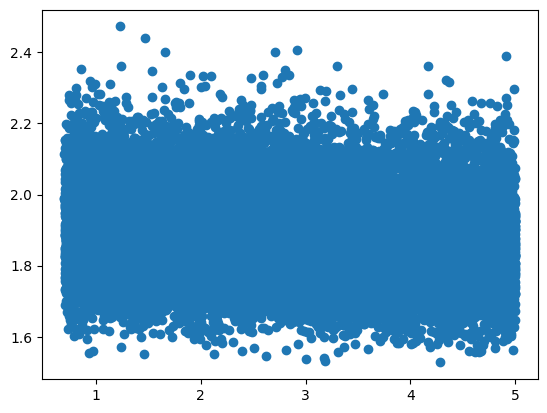

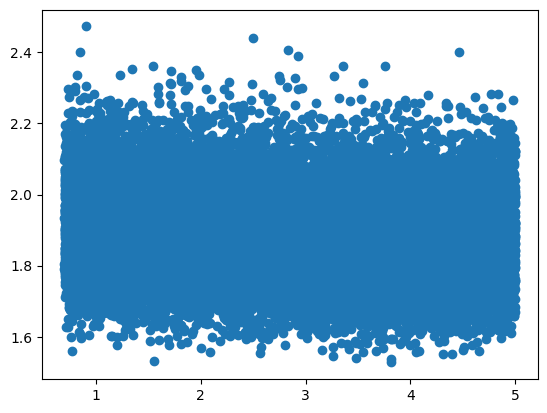

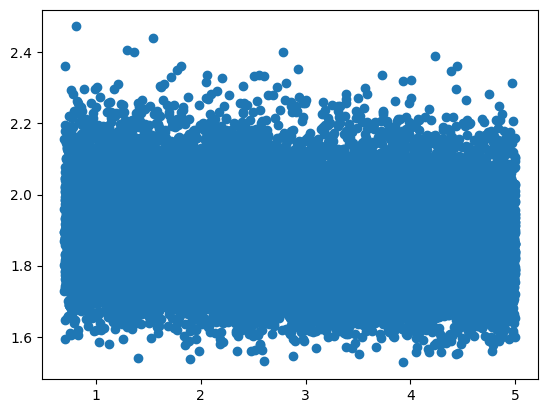

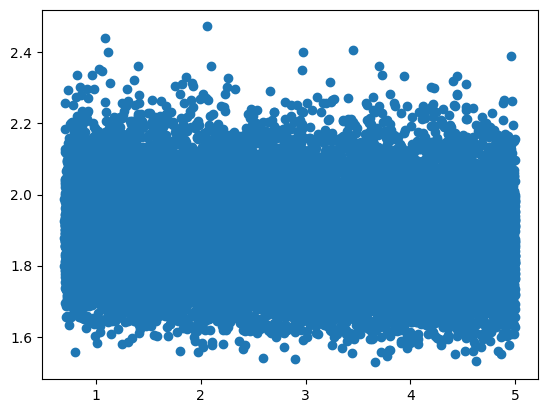

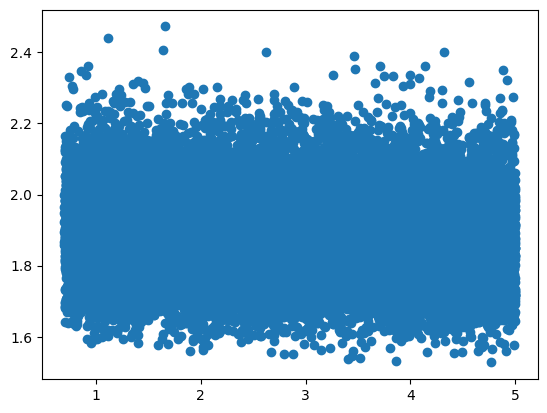

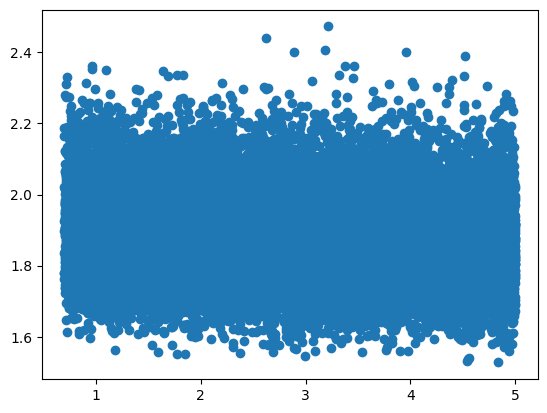

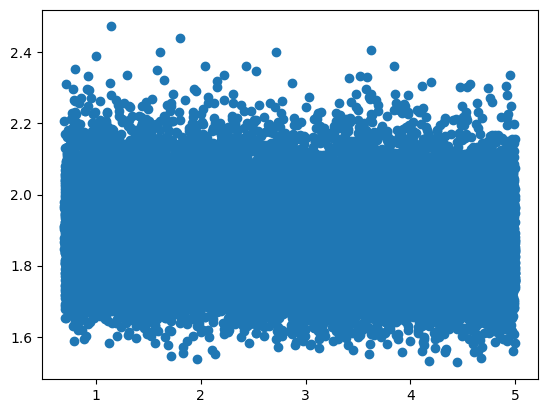

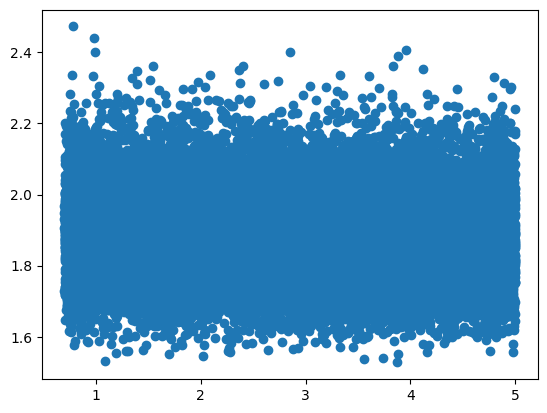

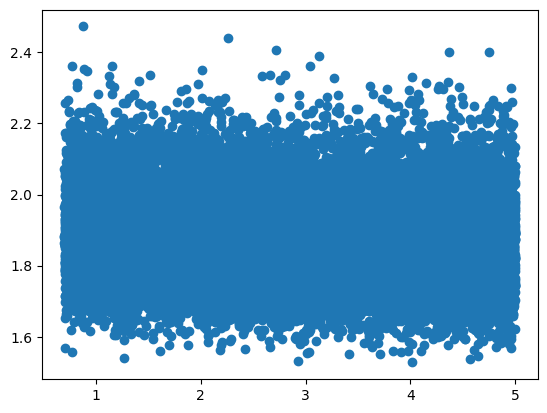

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(2,40):
  plt.scatter(modified_dataset.iloc[:, i], modified_dataset.iloc[:,1])
  plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
modified_n_dataset = scaler.fit_transform(modified_dataset)
modified_n_dataset = pd.DataFrame(modified_dataset)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(100,100)
sns.heatmap(modified_n_dataset.corr(), annot=True, annot_kws={"size": 30})
plt.show()

In [ ]:
X = modified_n_dataset.iloc[:, 2:].values
y = modified_n_dataset.iloc[:, 0:2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='linear')  # 2 outputs for regression
])

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 7: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Step 8: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2050 - mae: 0.3079 - val_loss: 0.0266 - val_mae: 0.1215
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0259 - mae: 0.1184 - val_loss: 0.0209 - val_mae: 0.1054
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0198 - mae: 0.1029 - val_loss: 0.0163 - val_mae: 0.0925
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162 - mae: 0.0922 - val_loss: 0.0131 - val_mae: 0.0831
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0127 - mae: 0.0809 - val_loss: 0.0103 - val_mae: 0.0727
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0104 - mae: 0.0724 - val_loss: 0.0087 - val_mae: 0.0651
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - mae: 0.0639 - val_loss: 0.0080 - val_mae: 0.0632
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 - mae: 0.0553 - val_loss: 0.0064 - val_mae: 0.0568
Epoch 9/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,120 (55.16 KB)

 Trainable params: 4,706 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,414 (36.78 KB)

None
